In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# import the wine dataset
url = "D:\data\wine.data"
dataset = pd.read_csv(url)

FileNotFoundError: File b'D:\\data\\wine.data' does not exist

In [40]:
X = dataset.iloc[:,1:14]

In [49]:
y = dataset.iloc[:,0:1]

In [52]:
# split the dataset into test dataset and training dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, random_state = 0)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
# perform PCA for two components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [63]:
# perform classificatin
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test results
y_pred = classifier.predict(X_test)

# Making the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
cm

array([[6, 0, 0],
       [0, 7, 0],
       [0, 0, 5]], dtype=int64)

In [69]:
# Visualize the results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

In [75]:
aranged_pc1 = np.arange(start = X_set[:,0].min(), stop = X_set[:,0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[: 1].min(), stop = X_set[:,1].max(), step = 0.01)

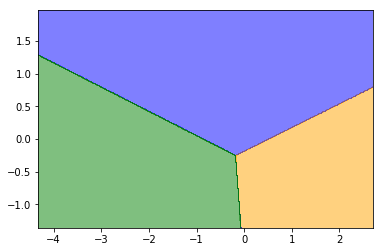

In [76]:
X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, cmap = ListedColormap(('orange','blue','green')))

IndexError: too many indices for array

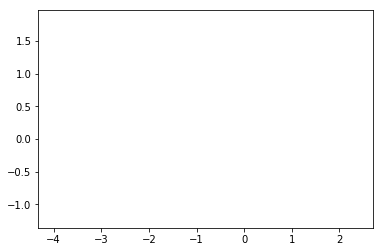

In [79]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)


In [ ]:
plt.title('Principal Components Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend
plt.show()